## Child Friendly Metrics

In [9]:
import math
import numpy as np
import pandas as pd
%matplotlib inline

**The Metric!**

I decided to take into account the amount of playground equipment and whether it is ADA Accessible. First, in order to do so, we must first look at the data.

In [18]:
playground = pd.read_csv("playground-data.csv",parse_dates = True)
playground.groupby("name")
'''
This was code added after I finished my analysis
print(playground['neighborhood'].value_counts())

'''
dots = playground[['longitude','latitude']]

playground = playground[["name","neighborhood","ada_accessible"]]
playground.head()

Squirrel Hill South    32
East Liberty           26
Beechview              21
Allegheny Center       15
South Side Slopes      14
                       ..
Bluff                   2
Central Oakland         2
Esplen                  2
West Oakland            1
Strip District          1
Name: neighborhood, Length: 67, dtype: int64


,name,neighborhood,ada_accessible
0,Able Long Playground,Beechview,f
1,North Ave. Playground,Allegheny Center,f
2,Vietnam Veteran's Playground,Squirrel Hill South,f
3,Schenley Overlook Playground,Squirrel Hill South,t
4,Schenley Overlook Playground,Squirrel Hill South,f


**Let's Look a bit deeper**

What we have is all of the playground equipment that is spread out around the pittsburgh neighborhoods grouped by the playgrounds that they are in. Now let's look at all of the equipment that that is ADA accessible.

In [11]:
ADA = playground[playground["ada_accessible"].str.contains("t", na = False)]

ADA.head(20)

,name,neighborhood,ada_accessible
3,Schenley Overlook Playground,Squirrel Hill South,t
6,Chartiers Playground,Windgap,t
10,Cross and Strauss Playground,Perry South,t
15,Dunbar Playground,Crafton Heights,t
18,Fineview Playground,Fineview,t
22,Kennard Playground,Terrace Village,t
27,Lewis Playground,Hazelwood,t
38,McGonigle Playground,Sheraden,t
50,Oakwood Playground,Oakwood,t
54,Roland Lockridge Playground,New Homestead,t


##### 

**What's next?**

When considering the data, I am going to give one point for any piece of equipment that exists. I will also award another point if that piece of equipment is also ADA accessible.

In [12]:
baseScore = playground["neighborhood"].value_counts(dropna = True).rename_axis("Neighborhood").reset_index(name = "Score")

baseScore.head(20)

,Neighborhood,Score
0,Squirrel Hill South,32
1,East Liberty,26
2,Beechview,21
3,Allegheny Center,15
4,South Side Slopes,14
5,Hazelwood,13
6,Sheraden,13
7,Elliott,11
8,Squirrel Hill North,10
9,Beltzhoover,10


In [13]:
addedBonus = ADA["neighborhood"].value_counts(dropna = True).rename_axis("Neighborhood").reset_index(name = "Score")

addedBonus.head(20)

,Neighborhood,Score
0,Squirrel Hill South,7
1,Elliott,4
2,South Side Slopes,4
3,East Liberty,4
4,Beechview,4
5,Highland Park,3
6,Sheraden,3
7,Mount Washington,3
8,Manchester,2
9,Crawford-Roberts,2


**Combining the data**

Now we, will add up the data all together

In [14]:
newScore = baseScore

index1 = 0
for i in newScore.iloc[:,0]:
    index2 = 0
    for j in addedBonus.iloc[:,0]:
        if i ==j:
            newScore.iloc[index1,1] += addedBonus.iloc[index2,1]
        index2 += 1
    
    index1 += 1

newScore.head(10)

,Neighborhood,Score
0,Squirrel Hill South,39
1,East Liberty,30
2,Beechview,25
3,Allegheny Center,16
4,South Side Slopes,18
5,Hazelwood,15
6,Sheraden,16
7,Elliott,15
8,Squirrel Hill North,11
9,Beltzhoover,12


**And Finally**

Now that we have the full score of the each neighborhood, it is time to make some GRAPHS!!!

First we'll look at the data of all of the compiled data then we will look at that without the ADA acessibility bonus.

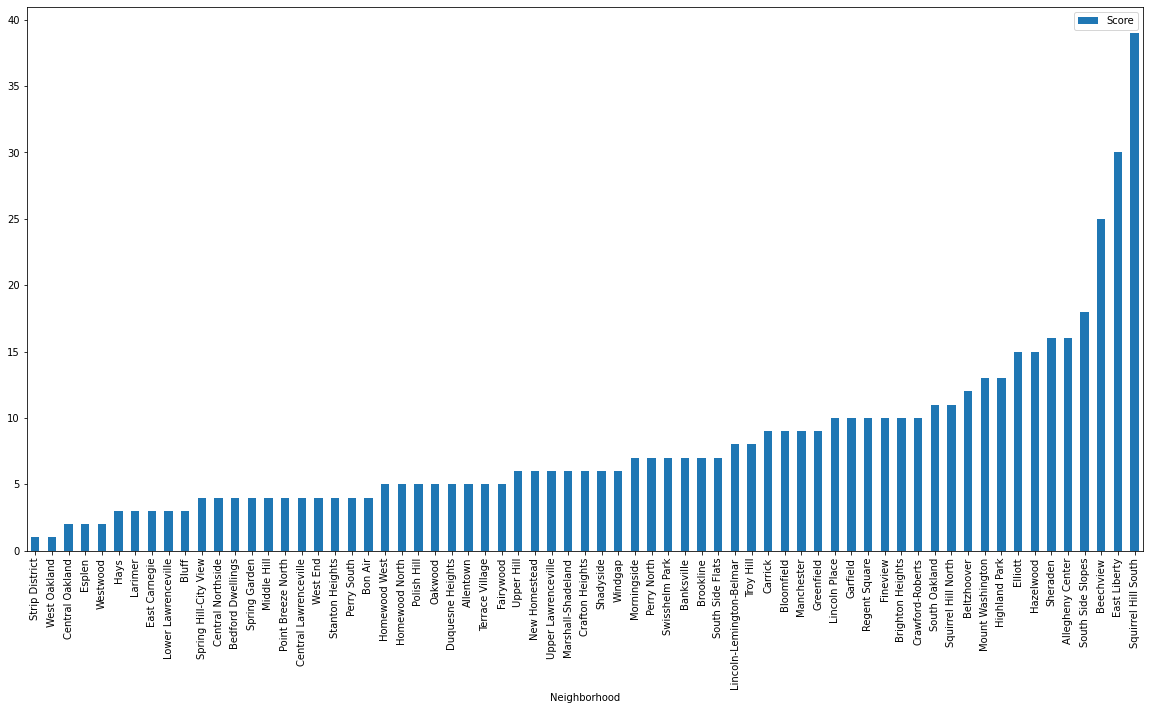

In [15]:
newScore = newScore.sort_values('Score',ascending = True).plot.bar("Neighborhood", "Score", figsize = (20,10))

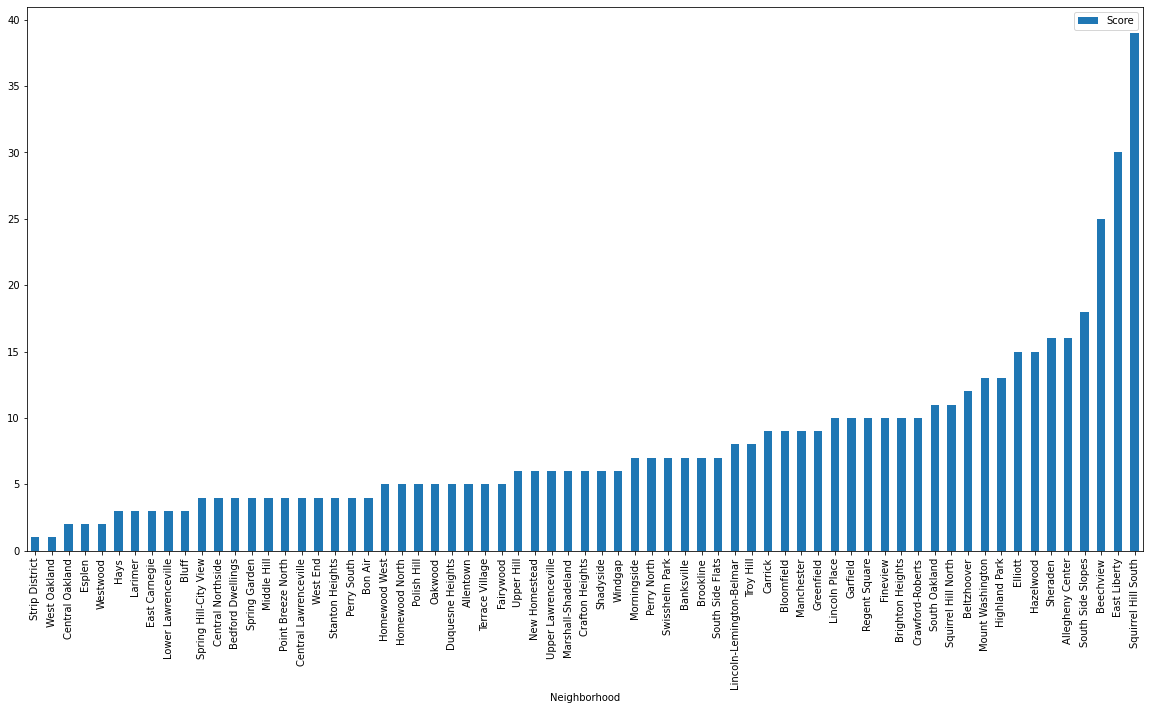

In [16]:
baseScore.sort_values("Score",ascending = True).plot.bar("Neighborhood","Score", figsize = (20,10))

## Conclusion
In both situations, if we look at the total amount of playbround equipment or take a wholistic approach and consider the ADA acessible items, Squirrel Hill South wins in both categories! The top three are also the same in both categories, with East Liberty and Beechview in that order. I know that this is not the best metric for deciding where you should live, when you should more heavily weigh crime and education quality, but playgrounds are just the fun. A place without playgrounds is a place that is not very hospitable for children, so I believe that this metric is still very important!